In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Import data:

https://keras.io/api/datasets/cifar10/

In [ ]:
cifar10 = keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


Explore data:

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Data augmentation:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )

datagen.fit(x_train)

Create test and validation sets:

In [ ]:
test_size = 2000
x_test, y_test = x_val[-test_size:], y_val[-test_size:]
x_val, y_val = x_val[:-test_size], y_val[:-test_size]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(8000, 32, 32, 3)
(8000, 1)
(2000, 32, 32, 3)
(2000, 1)


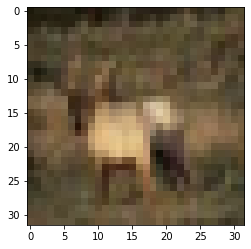

In [ ]:
plt.imshow(x_train[3])

In [ ]:
y_train[0]

array([6], dtype=uint8)

Pre-processing:

In [ ]:
x_train, x_val, x_test = x_train/255, x_val/255, x_test/255

In [ ]:
labels_dic = {0:'airplane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
              5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck' }
print(labels_dic[0])

airplane


Classifer:

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, RandomFlip, BatchNormalization
from keras.regularizers import l2

reg_rate = 0.002

# baseline model
model = keras.Sequential()

model.add(RandomFlip("horizontal_and_vertical", input_shape=(32,32,3)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(64, 3, padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPool2D(4))

model.add(Conv2D(128, 3, activation='relu'))
BatchNormalization()
model.add(Conv2D(128, 3, activation='relu'))
BatchNormalization()
model.add(MaxPool2D(2))


model.add(Conv2D(256, 3, padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(256, 3, padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(reg_rate)))
BatchNormalization
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(reg_rate)))
BatchNormalization()
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         147584    
                                                        

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam()
metrics = ['accuracy']
model.compile(optimizer, loss, metrics)

Training:

In [ ]:
batch_size = 64
epochs = 10

history = model.fit(x_train, y_train, batch_size, epochs,
                    validation_data=(x_val, y_val))

# history = model.fit(datagen.flow(x_train, y_train, batch_size),
#                               steps_per_epoch=len(x_train)/batch_size,
#                               epochs=epochs,
#                               validation_data=(x_val, y_val))

Epoch 1/10
782/782 [==============================] - 58s 62ms/step - loss: 2.0519 - accuracy: 0.1917 - val_loss: 1.8836 - val_accuracy: 0.2569
Epoch 2/10
782/782 [==============================] - 47s 60ms/step - loss: 1.6905 - accuracy: 0.3448 - val_loss: 1.4811 - val_accuracy: 0.4301
Epoch 3/10
782/782 [==============================] - 45s 58ms/step - loss: 1.4293 - accuracy: 0.4766 - val_loss: 1.3229 - val_accuracy: 0.5249
Epoch 4/10
782/782 [==============================] - 45s 58ms/step - loss: 1.2621 - accuracy: 0.5550 - val_loss: 1.2129 - val_accuracy: 0.5619
Epoch 5/10
782/782 [==============================] - 45s 58ms/step - loss: 1.1462 - accuracy: 0.6045 - val_loss: 1.0860 - val_accuracy: 0.6310
Epoch 6/10
782/782 [==============================] - 47s 60ms/step - loss: 1.0681 - accuracy: 0.6336 - val_loss: 1.0452 - val_accuracy: 0.6417
Epoch 7/10
782/782 [==============================] - 46s 59ms/step - loss: 1.0091 - accuracy: 0.6560 - val_loss: 1.0190 - val_accuracy:

Plot loss and accuracy plots:

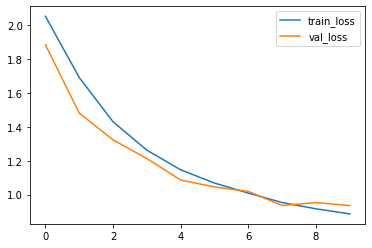

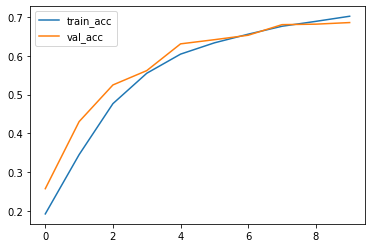

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()

plt.figure()

plt.plot(accuracy, label='train_acc')
plt.plot(val_accuracy, label='val_acc')
plt.legend()

Model evaluation:

In [ ]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 1s 4ms/step - loss: 0.9383 - accuracy: 0.6810


[0.9383194446563721, 0.6809999942779541]

Prediction:

In [ ]:
x_test[0].shape

(32, 32, 3)

In [ ]:
x_pred = np.expand_dims(x_test[0], axis=0)

In [ ]:
x_pred.shape

(1, 32, 32, 3)

In [ ]:
y_pred = np.argmin(model.predict(x_pred))
# print(np.argmin(y_pred))

1/1 [==============================] - 0s 220ms/step


In [ ]:
y_pred.shape

()

In [ ]:
y_test[0][0]

9

In [ ]:
y_pred_class = labels_dic[y_pred]
print('prediction:', y_pred_class)

print('ground truth:', labels_dic[y_test[0][0]])

prediction: frog
ground truth: truck


Save model:

In [ ]:
model.save('model2.h5')

In [ ]:
from keras.models import load_model

# m = load_model('model1.h5')